In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import os
from scipy.special import expit

In [2]:
def abrirImagenesEscaladas( carpeta, escala=200 ):
    # abre todas las imagenes de la carpeta, y las escala de tal forma que midan (escala x escala)px
    # devuelve las imagenes aplanadas -> vectores de tamano escala^2 con valores entre 0 y 1
    imagenes = []

    for dirpath, dirnames, filenames in os.walk(carpeta):
        for file in filenames:
            img = Image.open( os.path.join(carpeta, file) )
            img = img.resize((escala, escala))
            img.convert('1')
            img = np.asarray(img)
            if len(img.shape)==3:
                img = img[:,:,0].reshape((escala**2 )) / 255
            else:
                img = img.reshape((escala**2 )) / 255
            
            imagenes.append( img )

    return imagenes

In [3]:
def balancear_datos(imagenes_entrenamiento):
    imagenes_entrenamiento_balanceadas = abrirImagenesEscaladas(imagenes_entrenamiento)
    return imagenes_entrenamiento_balanceadas

In [4]:
# imagenes_sanos = np.array(balancear_datos("train_mini/sano")) #len = 349
# imagenes_neum = np.array(balancear_datos("train_mini/neumonia")) #len = 349

imagenes_sanos = np.array(balancear_datos("train_mini2/normal")) #len = 665
imagenes_neum = np.array(balancear_datos("train_mini2/neumonia")) #len = 665

In [5]:
# Definir el número de iteraciones y la tasa de aprendizaje
MAX_ITER = 1000
TOLERANCIA = 0.0001

In [6]:
def f(x,w,b):
    return (np.tanh(np.dot(x,w)+b)+1)/2

In [7]:
def L(x,d,w,b):
    y_p = f(x,w,b)
    return (y_p-d)**2

<h3>Ejercicio 1</h3>
Gradiente w: sum((tanh(w*i_i+b)+12-d_i)(1-(tanh(w*i_i+b))**2)*i_i)<br>

Gradiente b: sum((tanh(w*i_i+b)+12-d_i)(1-(tanh(w*i_i+b))**2))

Sumatoria realizada dentro del descenso por gradiente

In [8]:
# Derivadas de L(w, b)
def dW(x,d,w,b):
    y_p = f(x,w,b)
    return (y_p-d)*(1-np.tanh(np.dot(x,w)+b)**2) * x

def dB(x,d,w,b):
    y_p = f(x,w,b)
    return (y_p-d)*(1-np.tanh(np.dot(x,w)+b)**2)

<h3>Ejercicio 2</h3>

In [78]:
# Función de búsqueda de parámetros con los cuales se minimiza de L(w, b)
def gradiente_descendente(x_sanos,x_enfermos,alpha):
    # Valores iniciales de w y b
    w_t = np.zeros(x_sanos.shape[1]) # cada imagen de x_sanos y x_enfermos con la misma cantidad de columnas
    b_t = 0
    errores_cuadraticos_promedios = []

    # Mientras no hayamos llegado al maximo de iteraciones
    iter = 0
    error_anterior = float('inf')

    while iter <= MAX_ITER:
        # Computamos siguientes w y b a partir de las derivadas de la función
        grad_w = 0
        grad_b = 0
        error = 0

        
        d_sanos=0 #diagnostico para el conjunto de imagenes sin neumonía
        for i in range(len(x_sanos)):  
            grad_w += dW(x_sanos[i],d_sanos,w_t,b_t)
            grad_b += dB(x_sanos[i],d_sanos,w_t,b_t)
            error += L(x_sanos[i],d_sanos,w_t,b_t)
        
        d_neum=1 #diagnostico para el conjunto de imagenes con neumonía
        for i in range(len(x_enfermos)):
            grad_w += dW(x_enfermos[i],d_neum,w_t,b_t)
            grad_b += dB(x_enfermos[i],d_neum,w_t,b_t)
            error+=L(x_enfermos[i],d_neum,w_t,b_t)

        #se toma promedio para optimizar la copmplejidad y estabilizar el algoritmo, siendo que la dirección no cambia al ser multiplicada por un escalar
        grad_w /= (len(x_sanos) + len(x_enfermos))
        grad_b /= (len(x_sanos) + len(x_enfermos))
        error/=(len(x_sanos) + len(x_enfermos)) #se toma error promedio ya que es una equivalencia que permite hacer la convergencia más rápido y a la vez ser representativa de las diferencias absolutas entre errores cuadráticos totales

        errores_cuadraticos_promedios.append(error) #para el gráfico de convergencia
        
        print(f'iteracion: {iter}, error: {error}')

        w_tsig = w_t - alpha * grad_w
        b_tsig = b_t - alpha * grad_b

        # Chequeamos si ya alcanzamos la convergencia
        if abs(error_anterior - error) < TOLERANCIA:
            break

        # Preparamos la siguiente iteración
        w_t = w_tsig
        b_t = b_tsig
        error_anterior = error
        # alpha = alpha* 0.95
        iter = iter + 1

    return w_t, b_t, errores_cuadraticos_promedios

In [79]:
#0.0013 el mejor alfa
w, b, errores = gradiente_descendente(imagenes_sanos, imagenes_neum, 0.0013)

iteracion: 0, error: 0.25
iteracion: 1, error: 0.24037984729329892
iteracion: 2, error: 0.3133828662143434
iteracion: 3, error: 0.48194479564223974
iteracion: 4, error: 0.46379823383634466
iteracion: 5, error: 0.3690547997624137
iteracion: 6, error: 0.4431171619494743
iteracion: 7, error: 0.21183169302246468
iteracion: 8, error: 0.31995373336631366
iteracion: 9, error: 0.48138838403008893
iteracion: 10, error: 0.4549892520898492
iteracion: 11, error: 0.2658422789382229
iteracion: 12, error: 0.48655820862193655
iteracion: 13, error: 0.4774882527259108
iteracion: 14, error: 0.44696891979489817
iteracion: 15, error: 0.24096723052126764
iteracion: 16, error: 0.48631378015515936
iteracion: 17, error: 0.4734185150816112
iteracion: 18, error: 0.41194372985091154
iteracion: 19, error: 0.2619015856582835
iteracion: 20, error: 0.4884287194452897
iteracion: 21, error: 0.4796528596609019
iteracion: 22, error: 0.44723286928973854
iteracion: 23, error: 0.20392007890500602
iteracion: 24, error: 0.474

In [80]:
prediccion_train_sanos = np.round(f(imagenes_sanos, w, b))
prediccion_train_enfermos = np.round(f(imagenes_neum, w, b))

print(prediccion_train_sanos, prediccion_train_enfermos)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.

In [81]:
x_test_sanos = np.array(balancear_datos("test/NORMAL"))
x_test_neum = np.array(balancear_datos("test/PNEUMONIA"))
# w_test, b_test = gradiente_descendente(x_test_sanos, x_test_neum, 0.001)


In [82]:
test_sanos = np.round(f(x_test_sanos, w, b))

suma_errores = 0
for i in range(len(test_sanos)):
    if test_sanos[i] == 1:
        suma_errores +=1

print(f'Diagnosticos a partir de descenso por gradiente: {test_sanos}; \nErrores: {suma_errores} de {len(test_sanos)}')

Diagnosticos a partir de descenso por gradiente: [0. 0. 1. 1. 1. 0. 0. 0. 1. 0. 1. 1. 0. 0. 1. 1. 1. 0. 0. 0. 1. 1. 0. 0.
 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1.
 1. 1. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 1. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0.]; 
Errores: 44 de 234


In [83]:
test_neumonia = np.round(f(x_test_neum, w, b))


suma_errores = 0
for i in range(len(test_neumonia)):
    if test_neumonia[i] == 0:
        suma_errores +=1

print(f'Diagnosticos a partir de descenso por gradiente: {test_neumonia}; \nErrores: {suma_errores} de {len(test_neumonia)}')

Diagnosticos a partir de descenso por gradiente: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1.
 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 0. 0. 1. 1. 1. 0. 1. 0. 0. 0. 0. 1. 1. 1. 1. 1. 0. 0. 1. 1. 0. 1.
 1. 0. 1. 1. 0. 1. 1. 1. 0. 0. 1. 0. 0. 0. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1.
 1. 1. 1. 1. 1. 0. 1. 1. 0. 0. 0. 1. 1. 0. 0. 0. 1. 1. 0. 0. 0. 1. 1. 0.
 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 0.
 0. 1. 1. 1. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 1. 1. 0. 1. 1. 1. 0. 0. 0.
 1. 1. 1. 0. 0. 0. 1. 0. 0. 0. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 0. 1.
 1

Con alpha 0.0013 -> 44 y 73 errores en sanos y enfermos respect, iteracion: 245, error: 0.0556
<br>Con alpha 0.0011 -> 43 y 81 errores, iteracion: 210, error: 0.061
<br>Con alpha 0.001 -> 40 y 84 errores, iteracion: 185, error: 0.065
<br>Con alpha 0.0009 -> 39 y 88 errores, iteracion: 168, error: 0.0695
<br>Con alpha 0.0008 -> 32 y 96 errores, 148 iteraciones, epsilon 0.0001 error: 0.076
<br>Con alpha 0.0003 -> 71 y 39 errores, 320 iteraciones epsilon 0.0001 error = 0.076 <br><br>
Con alpha 0.0002 -> 52 y 83 errores, 49 iteraciones con epsilon 0.001 error=.0.18<br>
Con alpha 0.0002 -> 64 y 45 errores, 358 iteraciones epsilon 0.0001 error = 0.086<br>
Con alpha 0.0002 -> 89 y 26 errores, 1000 iteraciones epsilon 0.00001 error = 0.056
<br>
<br>
Con alpha 0.0001 -> 59 y 55 errores, 422 iteraciones epsilon 0.0001 escala 200 error = 0.10
<br>
<br>
Con alpha 0.00013 -> 62 y 52 errores, 332 iteracines epsilon 0.0001 escala 200 error = 0.097<br>
Con alpha 0.00018 -> 64 y 49 errores, 332 iteracines epsilon 0.0001 escala 200 error = 0.09
<br>

Con alpha 0.0000001 sin promediar el gradiente -> error = 0.09 en 400 iteraciones

<h3>Ejercicio 3: Error Cuadrático</h3>

In [99]:
#Una vez que ya se tiene w y b se puede calcular el error cuadrático del conjunto de test a 
# partir de las predicciones

error_cuadratico_test = 0
for i in range(len(x_test_sanos)):
    error_cuadratico_test+= (f(x_test_sanos[i],w,b)-0)**2
for j in range(len(x_test_neum)):
    error_cuadratico_test+= (f(x_test_neum[j],w,b)-1)**2

error_cuadratico_promedio = error_cuadratico_test/(len(x_test_sanos)+len(x_test_neum))
error_cuadratico_promedio

0.12403054881665966

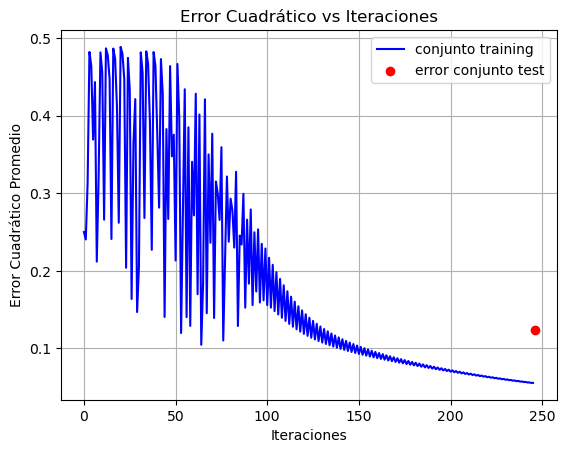

In [104]:
plt.plot(range(len(errores)), errores, color='blue', label='conjunto training')
plt.scatter(len(errores),error_cuadratico_promedio, color="red",label = "error conjunto test")
plt.plot()
plt.xlabel('Iteraciones')
plt.ylabel('Error Cuadrático Promedio')
plt.title('Error Cuadrático vs Iteraciones')
plt.grid()
plt.legend()
plt.show()